In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
from google.colab import files
uploaded = files.upload()

Saving PS_20174392719_1491204439457_log.csv to PS_20174392719_1491204439457_log (1).csv


In [4]:
df = pd.read_csv("PS_20174392719_1491204439457_log (1).csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# **Data Cleaning & Preparation**

In [6]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [7]:
# Remove duplicates
df = df.drop_duplicates()

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **Exploratory Data Analysis (EDA)**: Fraud Distribution


In [8]:
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
0,0.998709
1,0.001291


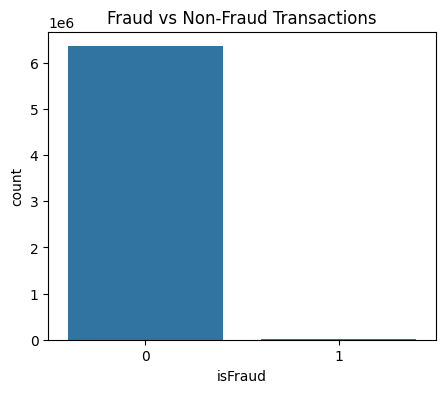

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

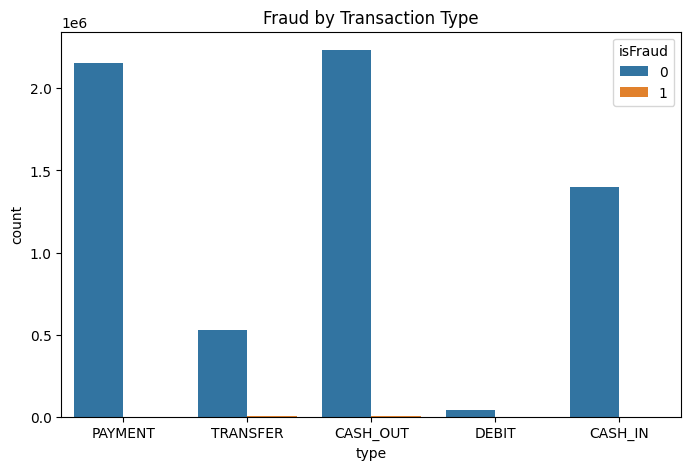

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title("Fraud by Transaction Type")
plt.show()

# **Financial Behavior Analysis**: Balance Consistency Check

In [11]:
df['balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

df[['oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].head()

,oldbalanceOrg,newbalanceOrig,balance_diff
0,170136.0,160296.36,9839.64
1,21249.0,19384.72,1864.28
2,181.0,0.00,181.00
3,181.0,0.00,181.00
4,41554.0,29885.86,11668.14


# **Feature Engineering**

In [13]:
df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)

df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']

# **Fraud Detection Model (ML)**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest',
    'amount_to_balance_ratio', 'dest_balance_change'
]

X = df[features]
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Training Model**

In [15]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [16]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



# **Feature Importance**: Business Insight

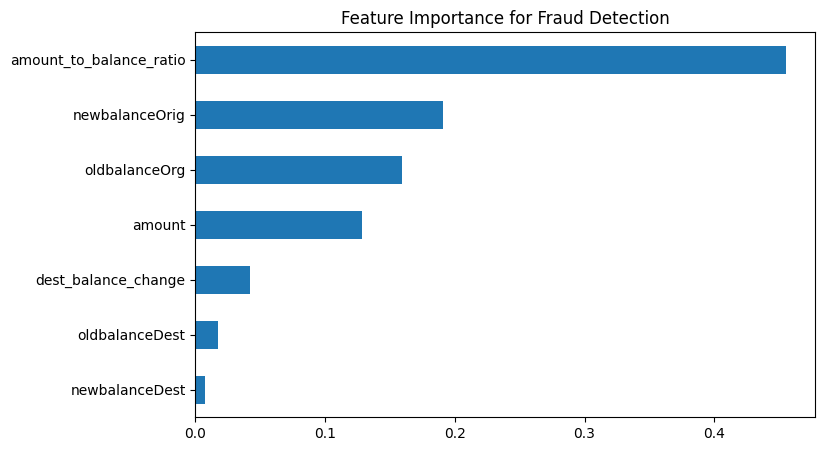

In [17]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance for Fraud Detection")
plt.show()

**Important Insights**

Fraud transactions are rare but highly concentrated in specific transaction types.

Large transaction amounts relative to origin balance strongly indicate fraud.

Sudden balance inconsistencies are a key fraud signal.

**Business Impact**

Fraud detection models can flag risky transactions in real-time.

Financial institutions can reduce losses by prioritizing high-risk transaction types.

In [18]:
y_prob = model.predict_proba(X_test)[:, 1]

# **ROC Curve & AUC**

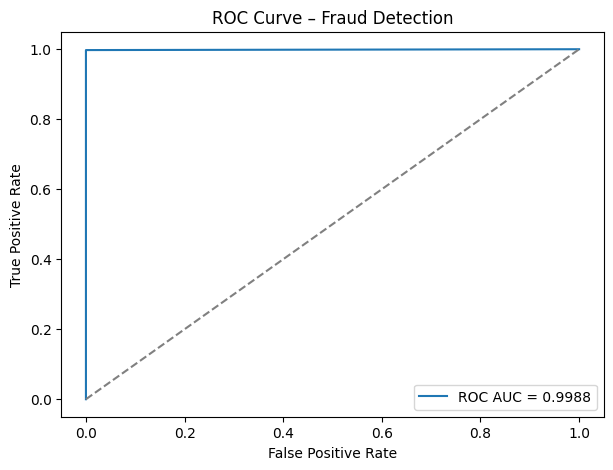

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Fraud Detection')
plt.legend()
plt.show()


ROC-AUC measures how well the model separates fraud from non-fraud across all thresholds.

From the graph above, If you randomly pick one fraud and one non-fraud transaction, the model will assign a higher fraud probability to the fraud transaction 99.88% of the time.

# **Precision–Recall Curve (Most Important for Fraud)**

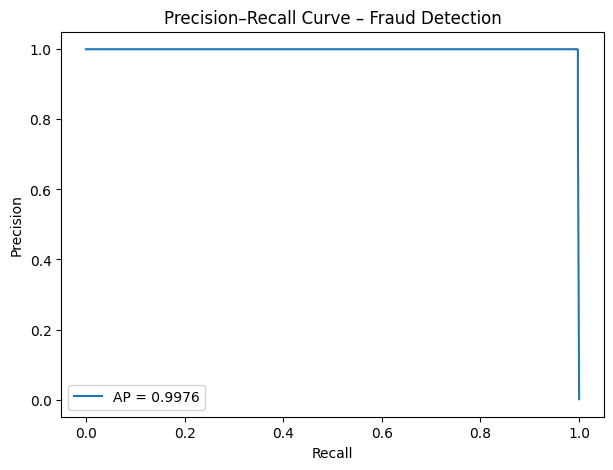

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'AP = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Fraud Detection')
plt.legend()
plt.show()

Average Precision (AP) summarizes how well the model maintains high precision as recall increases
As we increase fraud detection sensitivity (recall), precision remains extremely high.

This means:

Very few false positives

Very few missed fraud cases

Strong ranking quality of fraud probabilities